Importing all packages and modules in one cell

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


from library.sb_utils import save_file

Objectives: 

-Perform Data Wrangling on the csv files obtained from : https://emp.lbl.gov/tracking-the-sun

-Evaluate missing values in calumns and which columns to use for our analysis. 

A preliminary review of the csv file shows the list of columns and their descriptions. 

In [2]:
!ls

Capstone2_Data_Wrangling.ipynb          library
TTS_LBNL_public_file_19-Oct-2020_p1.csv


The entire data set is split into 2 separate csv files. Consequently two data frames are created - pv_df1 and pv_df2 corresponding to each csv file. In doing so, the file with more data, has lost some data ( 1 row in this case) since the csv. application can only handle a maximum number 1,000,000 rows and our data set has 1,000,001. 

In [24]:
pv_df1 = pd.read_csv('../data/raw/TTS_LBNL_public_file_19-Oct-2020_p1.csv')
pv_df1.head()

/Users/srijagannathan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,3,14,30,31,33,34,38,55,56,58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,...,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,Arkansas State Energy Office,-9999,-9999,-9999,29-Apr-2010 00:00:00,2.016,14558.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.178947,-9999.0,-9999.0
1,Arkansas State Energy Office,-9999,-9999,-9999,26-Apr-2010 00:00:00,3.360,26096.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.178947,-9999.0,-9999.0
2,Arkansas State Energy Office,-9999,-9999,-9999,20-Apr-2010 00:00:00,13.440,91139.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.178947,-9999.0,-9999.0
3,Arkansas State Energy Office,-9999,-9999,-9999,21-Apr-2010 00:00:00,5.520,40043.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.210526,-9999.0,-9999.0
4,Arkansas State Energy Office,-9999,-9999,-9999,22-Apr-2010 00:00:00,2.530,21497.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.210526,-9999.0,-9999.0


Given that the above specified columns have a mixed dtype in there, it will be useful to import those columns as all strings. 

In [26]:
pv_df1.shape

(1000000, 78)

In [27]:
pv_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 78 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   data_provider_1                  1000000 non-null  object 
 1   data_provider_2                  1000000 non-null  object 
 2   system_ID_1                      1000000 non-null  object 
 3   system_ID_2                      1000000 non-null  object 
 4   installation_date                1000000 non-null  object 
 5   system_size_DC                   1000000 non-null  float64
 6   total_installed_price            1000000 non-null  float64
 7   rebate_or_grant                  1000000 non-null  float64
 8   customer_segment                 1000000 non-null  object 
 9   expansion_system                 1000000 non-null  int64  
 10  multiple_phase_system            1000000 non-null  int64  
 11  new_construction                 1000000 non-null  

In [29]:
pv_df2 = pd.read_csv('../data/raw/TTS_LBNL_public_file_19-Oct-2020_p2.csv')
pv_df2.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 5: invalid start byte

On reading the second data file we see that it has some encoded data. We try to determine the encoding using the chardet module as shown below. 

In [30]:
import chardet
file = '../data/raw/TTS_LBNL_public_file_19-Oct-2020_p2.csv'

In [31]:
with open(file,'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

The encoding is ascii as shown from the line of code above. Using a latin1 encoding we are able to read the csv file without any errors.

In [32]:
pv_df2 = pd.read_csv('../data/raw/TTS_LBNL_public_file_19-Oct-2020_p2.csv', encoding = "latin1")
pv_df2.head()

/Users/srijagannathan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,2,3,14,15,17,19,27,28,30,31,33,34,37,38,39,52,53,55,56,58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,...,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,Arizona Public Service,-9999,R1297,-9999,03-Feb-2009 00:00:00,8.64,57162.77,25920.0,RES,0,...,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0
1,Arizona Public Service,-9999,R1268,-9999,26-Jan-2009 00:00:00,3.40,26507.20,10500.0,RES,0,...,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0
2,Arizona Public Service,-9999,R1023,-9999,15-Oct-2008 00:00:00,4.80,36292.00,12960.0,RES,0,...,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0
3,Arizona Public Service,-9999,R1180,-9999,02-Feb-2009 00:00:00,1.52,13230.00,4560.0,RES,0,...,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0
4,Arizona Public Service,-9999,R1451,-9999,30-Mar-2009 00:00:00,5.10,40370.32,15300.0,RES,0,...,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0


Printing details about the second data frame below. The .info gives an idea of how many columns the data frame has and what types of data the columns hold. Additionally the non zero count gives an insight into how many non null values or valid values are present. 

In [33]:
pv_df2.shape

(844487, 78)

In [34]:
pv_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844487 entries, 0 to 844486
Data columns (total 78 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   data_provider_1                  844487 non-null  object 
 1   data_provider_2                  844487 non-null  object 
 2   system_ID_1                      844487 non-null  object 
 3   system_ID_2                      844487 non-null  object 
 4   installation_date                844487 non-null  object 
 5   system_size_DC                   844487 non-null  float64
 6   total_installed_price            844487 non-null  float64
 7   rebate_or_grant                  844487 non-null  float64
 8   customer_segment                 844487 non-null  object 
 9   expansion_system                 844487 non-null  int64  
 10  multiple_phase_system            844487 non-null  int64  
 11  new_construction                 844487 non-null  int64  
 12  tr

In [72]:
# Concatenating the two data frames. Apprending pv_df2 below pv_df1
pv_df = pd.concat([pv_df1, pv_df2], ignore_index = True)
pv_df.shape

(1844487, 78)

We can see that the two data frames are combined into 1 with 1.8 milion rows!

### Exploring the data: 

The next section will focus on the different columns the data frame has and the kind of data it holds. 

Both data frames have a warning that certain numner of columns have mixed data types. So, lets have a look at that!
Columns (1,2,3,14,15,17,19,27,28,30,31,33,34,37,38,39,52,53,55,56,58,59)

In order to analyze these columns further lets create a separate data frame only with these specific columns.

In [63]:
column_list = [1,2,3,14,15,17,19,27,28,30,31,33,34,37,38,39,52,53,55,56,58,59]
mixed_df = pv_df.iloc[:,column_list]
mixed_df.head()

,data_provider_2,system_ID_1,system_ID_2,zip_code,city,utility_service_territory,installer_name,module_manufacturer_1,module_model_1,module_manufacturer_2,...,module_model_3,technology_module_1,technology_module_2,technology_module_3,inverter_manufacturer_1,inverter_model_1,inverter_manufacturer_2,inverter_model_2,inverter_manufacturer_3,inverter_model_3
0,-9999,-9999,-9999,71953,Mena,SWEPCO,Liberty Solar Solutions,Sharp,ND-224UC1,-9999,...,-9999,Multi-c-Si,-9999,-9999,ENPHASE ENERGY INC.,-9999,-9999,-9999,-9999,-9999
1,-9999,-9999,-9999,72641,Jasper,Carroll Electric,Liberty Solar Solutions,Sharp,ND-224UC1,-9999,...,-9999,Multi-c-Si,-9999,-9999,ENPHASE ENERGY INC.,-9999,-9999,-9999,-9999,-9999
2,-9999,-9999,-9999,71801,Hope,Hope Water & Light,Liberty Solar Solutions,Sharp,ND-224UC1,-9999,...,-9999,Multi-c-Si,-9999,-9999,ENPHASE ENERGY INC.,-9999,-9999,-9999,-9999,-9999
3,-9999,-9999,-9999,71909,Hot Springs Village,First Electric,Liberty Solar Solutions,Sharp,NU-U230F3,-9999,...,-9999,Mono,-9999,-9999,ENPHASE ENERGY INC.,-9999,-9999,-9999,-9999,-9999
4,-9999,-9999,-9999,71909,Hot Springs Village,Entergy,Liberty Solar Solutions,Sharp,NU-U230F3,-9999,...,-9999,Mono,-9999,-9999,ENPHASE ENERGY INC.,-9999,-9999,-9999,-9999,-9999


In [39]:
mixed_df.shape

(1844487, 22)

In [40]:
mixed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844487 entries, 0 to 844486
Data columns (total 22 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   data_provider_2            object
 1   system_ID_1                object
 2   system_ID_2                object
 3   zip_code                   object
 4   city                       object
 5   utility_service_territory  object
 6   installer_name             object
 7   module_manufacturer_1      object
 8   module_model_1             object
 9   module_manufacturer_2      object
 10  module_model_2             object
 11  module_manufacturer_3      object
 12  module_model_3             object
 13  technology_module_1        object
 14  technology_module_2        object
 15  technology_module_3        object
 16  inverter_manufacturer_1    object
 17  inverter_model_1           object
 18  inverter_manufacturer_2    object
 19  inverter_model_2           object
 20  inverter_manufacturer_3  

Looking at the data frame that supposedly has mixed columns we see that all the columns are of datatype object (string). However the missing values here are identified as -9999. This creates some confusion. Additionally it can be seen that the columns of interest are all descriptive columns such as model number, model manufacturer, service territory etc. 

Whether we need to update these columns with valid values or drop them altogether will depend on the problem we are going to solve. For instance, if our goal is to create a pricing model for residential installations, we can focus on the state and or territory but we can do without the zip code. Likewise if a great number of values for module manufacturer and system_ID are missing, it may not be useful to assume values for the missing pieces of data. It might make more sense to get rid of these columns based on the percentage of missing values. 

For now, however it is good to know the specific columns with the mixed data types. One step that can be taken here is that the values in these columns can all be converted to string dtype. 

In [73]:
pv_df.iloc[:,1].astype(str)

0          -9999
1          -9999
2          -9999
3          -9999
4          -9999
           ...  
1844482    -9999
1844483    -9999
1844484    -9999
1844485    -9999
1844486    -9999
Name: data_provider_2, Length: 1844487, dtype: object

In [74]:
for column in column_list:
    pv_df.iloc[:, column] = pv_df.iloc[:, column].astype(str)

In [75]:
pv_df.head()

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,...,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,Arkansas State Energy Office,-9999,-9999,-9999,29-Apr-2010 00:00:00,2.016,14558.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.178947,-9999.0,-9999.0
1,Arkansas State Energy Office,-9999,-9999,-9999,26-Apr-2010 00:00:00,3.360,26096.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.178947,-9999.0,-9999.0
2,Arkansas State Energy Office,-9999,-9999,-9999,20-Apr-2010 00:00:00,13.440,91139.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.178947,-9999.0,-9999.0
3,Arkansas State Energy Office,-9999,-9999,-9999,21-Apr-2010 00:00:00,5.520,40043.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.210526,-9999.0,-9999.0
4,Arkansas State Energy Office,-9999,-9999,-9999,22-Apr-2010 00:00:00,2.530,21497.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.210526,-9999.0,-9999.0


### Calculating % of missing values or alternatively columns with values -9999 in the main pv_df dataframe. 

Given that all missing/ invalid values are set as -9999. We will first replace all -9999 with a NaN since pandas has more useful tools to analyze null values.

In [84]:
pv1 = pv_df

In [85]:
pv1[pv1 == '-9999']= np.nan
pv1.head()

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,...,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,Arkansas State Energy Office,NaN,NaN,NaN,29-Apr-2010 00:00:00,2.016,14558.0,0.0,RES,0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
1,Arkansas State Energy Office,NaN,NaN,NaN,26-Apr-2010 00:00:00,3.360,26096.0,0.0,RES,0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
2,Arkansas State Energy Office,NaN,NaN,NaN,20-Apr-2010 00:00:00,13.440,91139.0,0.0,RES,0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
3,Arkansas State Energy Office,NaN,NaN,NaN,21-Apr-2010 00:00:00,5.520,40043.0,0.0,RES,0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,NaN,NaN
4,Arkansas State Energy Office,NaN,NaN,NaN,22-Apr-2010 00:00:00,2.530,21497.0,0.0,RES,0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,NaN,NaN


Note that the replacement of -9999 with np.nan only worked partially since we only asked pandas to replace the string -9999 values. The columns that have integer and float values in them still have a -9999 present. Lets try and have a look at columns with numeric values of -9999.

In [86]:
pv1 == -9999

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,...,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844482,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1844483,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1844484,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1844485,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [87]:
pv1 == -9999.0

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,...,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844482,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1844483,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1844484,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1844485,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Replacing -9999 with np.nan

In [88]:
pv1[pv1 == -9999] = np.nan
pv1.head()

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,...,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,Arkansas State Energy Office,NaN,NaN,NaN,29-Apr-2010 00:00:00,2.016,14558.0,0.0,RES,0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
1,Arkansas State Energy Office,NaN,NaN,NaN,26-Apr-2010 00:00:00,3.360,26096.0,0.0,RES,0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
2,Arkansas State Energy Office,NaN,NaN,NaN,20-Apr-2010 00:00:00,13.440,91139.0,0.0,RES,0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
3,Arkansas State Energy Office,NaN,NaN,NaN,21-Apr-2010 00:00:00,5.520,40043.0,0.0,RES,0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,NaN,NaN
4,Arkansas State Energy Office,NaN,NaN,NaN,22-Apr-2010 00:00:00,2.530,21497.0,0.0,RES,0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,NaN,NaN


At this point we have converted all of our invalid values to nan. As a confirmation we do a search for the presence of '-9999' or -9999 in the dataframe. We iterate through the same columns above to see if there are any invalid values.

In [93]:
invalid_df = '-9999' in pv1.iloc[:,8]

In [92]:
print(invalid_df)

False


In [97]:
invalid_index = [] # creating a list to store indices with value -9999 or '-9999'
# iterating through the columns and checking for indices of rows that have an invalid value. This process essentially
# checks if all -9999s have been replaced with a nan successfully or not. The result should be that invalid_index should
#remain an empty list. That indicates that all -9999s have been successfully replaced.
for i in pv1.columns:
    ind = pv1.index[(pv1[i] == '-9999') | (pv1[i] == -9999)].tolist()
    invalid_index.append(ind)
print(invalid_index)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


We see that invalid_index gets returned as an empty list after iterating through all columns. This implies that our operation to replace the -9999s has been completed.

Note an alternative way to dealing with missing values: is to include attribute na_values at the time of importing the datafrom from the csv file. 
Refer article : https://towardsdatascience.com/working-with-missing-values-in-pandas-5da45d16e74 for dealing with missing values.

Having converted all invalid and missing values to nan we now find out the count of missing values in each column. This will give us an insight into how many columns have meaningful data that can be used.

In [111]:
missing_null = pd.concat([pv1.isnull().sum(), pv1.isnull().mean() * 100,pv1.dtypes], axis = 1)
missing_null.columns = ['Count', '%', 'Data_type']
missing_null.sort_values(by = 'Count')

,Count,%,Data_type
data_provider_1,0,0.000000,object
multiple_phase_system,0,0.000000,int64
expansion_system,0,0.000000,int64
installation_date,0,0.000000,object
state,0,0.000000,object
...,...,...,...
micro_inverter_3,1838219,99.660177,float64
built_in_meter_inverter_3,1838629,99.682405,float64
output_capacity_inverter_3,1839327,99.720247,float64
inverter_quantity_3,1840257,99.770668,float64


From the missing_null dataframe above we see that the column 'solar_storage_hybrid_inverter_3' is missing 100% of the values. Looking at the table of column descriptions, this column is a part of set of columns that describe the type of inverter. Lets try and display the other two columns.

In [114]:
pv1[['solar_storage_hybrid_inverter_1','solar_storage_hybrid_inverter_2','solar_storage_hybrid_inverter_3']]

,solar_storage_hybrid_inverter_1,solar_storage_hybrid_inverter_2,solar_storage_hybrid_inverter_3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
1844482,NaN,NaN,NaN
1844483,NaN,NaN,NaN
1844484,NaN,NaN,NaN
1844485,NaN,NaN,NaN


The table above shows most of the values to be missing. Lets have a look a the the non- null values to get a feel of what they look like. 

In [120]:
pv1['solar_storage_hybrid_inverter_2'][~pv1['solar_storage_hybrid_inverter_2'].isna()].value_counts()

0.0    47684
1.0      182
Name: solar_storage_hybrid_inverter_2, dtype: int64

In [122]:
pv1['solar_storage_hybrid_inverter_1'][~pv1['solar_storage_hybrid_inverter_1'].isna()].value_counts()

0.0    1175289
1.0       4156
Name: solar_storage_hybrid_inverter_1, dtype: int64

Solar_storage_hybrid_inverter_1, 2 an 3 : Indicate if the inverters identified are micro-inverters, solar/storage hybrid inverters, include built-in meters, and their output capacity. This is determined by cross-referencing inverter manufacturer and model names against equipment specification data available through solarhub.com and the California Energy Commission's list of eligible equipment. 

Based on the description above and the value_counts it appears that a value of 0 would imply a False and a value of 1 would imply a True. 

Since the column for solar_storage_hybrid_inverter_3 has 100% missing values we can drop that column as it provides us with no useful data. 

In [123]:
pv1.drop(columns = 'solar_storage_hybrid_inverter_3', inplace = True)
pv1.shape

(1844487, 77)

As they say a picture is worth a thousand words. So lets draw some plots to see what kind of data we are dealing with.

As an example lets analyze the distribution of installations by residential vs other categories. 

Step 1 - Extract column that has the segment type.

Step 2 - Store information of the count of each categorical value.

Step 3 - Plot distribution of installations by segment type. 

In [124]:
segment_type = pv1['customer_segment']
segment_type.unique()

array(['RES', 'NON-PROFIT', 'COM', 'GOV', 'SCHOOL', 'NON-RES', nan],
      dtype=object)

In [125]:
segment_type.value_counts()

RES           1756181
COM             36202
NON-RES         18033
GOV              5097
NON-PROFIT       3828
SCHOOL           3405
Name: customer_segment, dtype: int64

In [140]:
x_ticks = ['RESIDENTIAL', 'COMMERCIAL', 'NON-RESIDENTIAL' ,'GOVERNMENT', 'NON-PROFIT', 'SCHOOL']
segment_count = list(segment_type.value_counts())
segment_type_dist = pd.DataFrame({'Segment':segment_count}, index = x_ticks)
segment_type_dist.head()


,Segment
RESIDENTIAL,1756181
COMMERCIAL,36202
NON-RESIDENTIAL,18033
GOVERNMENT,5097
NON-PROFIT,3828


<AxesSubplot:title={'center':'PV installation by segment type'}, xlabel='Type of installation', ylabel='Intallation count based on segment'>

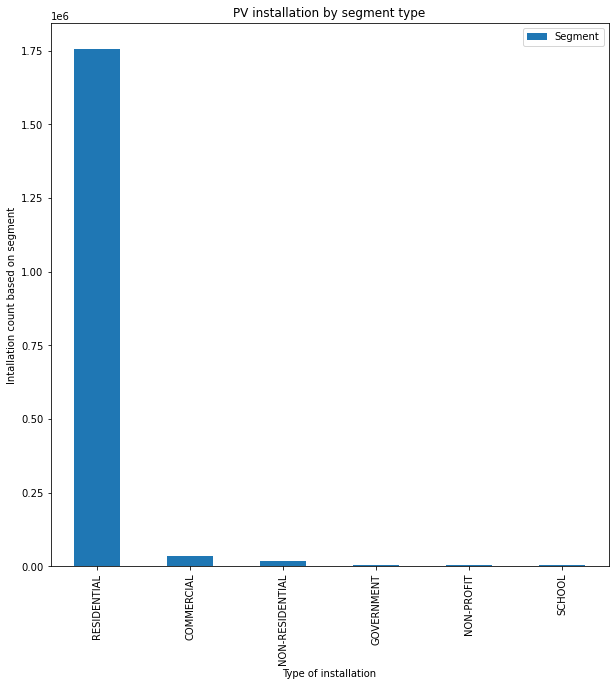

In [143]:


segment_type_dist.plot.bar(figsize = (10,10), title = 'PV installation by segment type', 
                           xlabel = 'Type of installation',ylabel = 'Intallation count based on segment')

As we can see a huge number of data points are for residential installations.Likewise we can make note of installations by state.

In [144]:
installation_state = pv1['state']
installation_state.unique()

array(['AR', 'CA', 'AZ', 'CO', 'CT', 'DC', 'DE', 'FL', 'IL', 'KS', 'MA',
       'MD', 'ME', 'MN', 'MO', 'NH', 'NM', 'NY', 'OH', 'OR', 'PA', 'RI',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'NJ'], dtype=object)

In [147]:
state_dist = installation_state.value_counts()
state_dist.head()

CA    1067882
AZ     160376
NJ     121497
MA     100684
NY      99642
Name: state, dtype: int64

In [150]:
state_count = list(installation_state.value_counts())
installation_state_dist = pd.DataFrame({'Installation State':state_count}, index = state_dist.index)
installation_state_dist.head()

,Installation State
CA,1067882
AZ,160376
NJ,121497
MA,100684
NY,99642


<AxesSubplot:title={'center':'PV installation by state'}, xlabel='State of installation', ylabel='Intallation count based on state'>

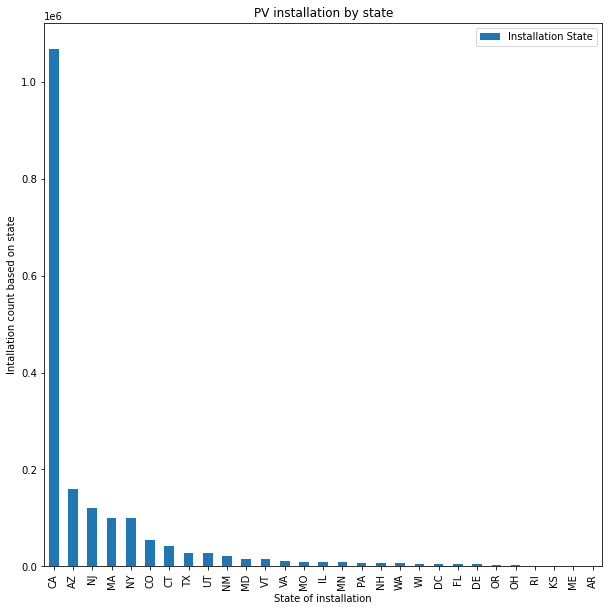

In [151]:
installation_state_dist.plot.bar(figsize = (10,10), title = 'PV installation by state', 
                           xlabel = 'State of installation',ylabel = 'Intallation count based on state')

As we see over 50% of the installations are in the state of California. This is interesting. One aspect that can be looked into is what makes California so popular for installations. Additionally, what percentage of California installations are residential? Is it climactic or economic? If economics is a significant factor, what can be done differently in other states with lower adoption to increase the count? These are some of the questions that can be looked into at a later stage. 

Another focus is: distribution of instllations by year. What was the oldest installation date? This can give an insight on as to whether PV adoption has increased, lowered or remained fairly the same over the years. 

However, it looks like the data has been adapted in a format that can be used for futher data analysis. 